### Importing libraries and the data set:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

df = pd.read_csv("train.csv") #Reading the dataset in a dataframe using Pandas

### Quick Data Exploration
Once you have read the dataset, you can have a look at few top rows by using the function `head()`

In [2]:
df.head(10)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   
6             2333             1516.0        95.0             360.0   
7             3036             2504.0       158.0             360.0   
8             4006             1526.0       168.0             360.0   
9            12841            10968.0       349.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y  
5             1.0         Urban           Y  
6             1.0         Urban           Y  
7             0.0     Semiurban           N  
8             1.0         Urban           Y  
9             1.0     Semiurban           N

This should print 10 rows. Alternately, you can also look at more rows by printing the dataset.

Next, you can look at summary of numerical fields by using `describe()` function

In [3]:
df.describe()              #Get summary of numerical variables

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

`describe()` function would provide count, mean, standard deviation (std), min, quartiles and max in its output (Read this article to refresh basic statistics to understand population distribution)

Here are a few inferences, you can draw by looking at the output of `describe()` function:

LoanAmount has (614 – 592) 22 missing values.
Loan_Amount_Term has (614 – 600) 14 missing values.
Credit_History has (614 – 564) 50 missing values.
We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome
Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:

In [4]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Similarly, we can look at unique values of port of credit history. Note that `dfname[‘column_name’]` is a basic indexing technique to acess a particular column of the dataframe

### Distribution analysis
Now that we are familiar with basic data characteristics, let us study distribution of various variables. Let us start with numeric variables – namely ApplicantIncome and LoanAmount

Lets start by plotting the histogram of ApplicantIncome using the following commands

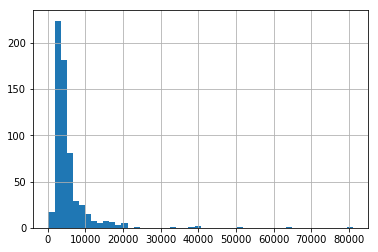

In [5]:
df['ApplicantIncome'].hist(bins=50)

Here we observe that there are few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

Next, we look at box plots to understand the distributions. Box plot for fare can be plotted by:

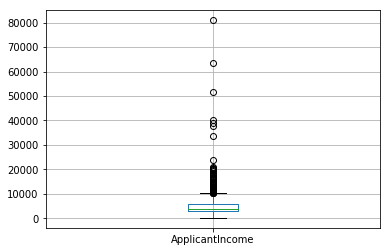

In [6]:
df.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

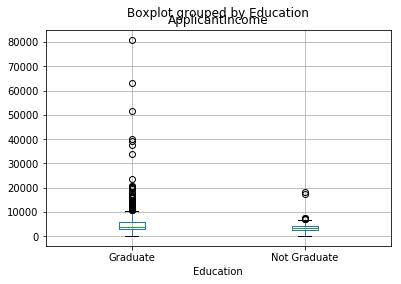

In [7]:
df.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Now, Let’s look at the histogram and boxplot of LoanAmount using the following command:

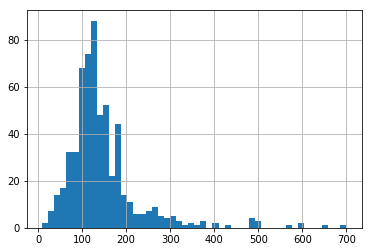

In [8]:
df['LoanAmount'].hist(bins=50)

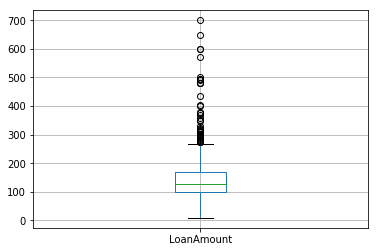

In [9]:
df.boxplot(column='LoanAmount')

Again, there are some extreme values. Clearly, both ApplicantIncome and LoanAmount require some amount of data munging. LoanAmount has missing and well as extreme values values, while ApplicantIncome has a few extreme values

### Grouping Data

In [10]:
print(df.groupby('Gender').size())

Gender
Female    112
Male      489
dtype: int64


### Data Munging in Python : Using Pandas

#### Check missing values in the dataset
Let us look at missing values in all the variables because most of the models don’t work with missing data and even if they do, imputing them helps more often than not. So, let us check the number of nulls / NaNs in the dataset

In [11]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Though the missing values are not very high in number, but many variables have them and each one of these should be estimated and added in the data.

Note: Remember that missing values may not always be NaNs

#### How to fill missing values in LoanAmount?
There are numerous ways to fill the missing values of loan amount – the simplest being replacement by mean, which can be done by following code:

In [12]:
 df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

The other extreme could be to build a supervised learning model to predict loan amount on the basis of other variables and then use age along with other variables to predict survival.

#### How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?
Let’s analyze LoanAmount first. Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

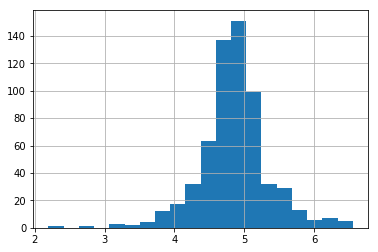

In [13]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided.

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.

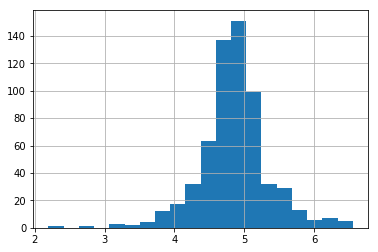

In [14]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20)